<a href="https://colab.research.google.com/github/bijaykahar/House-Price-Predection/blob/master/Home_Loan_Prediction_Rubixe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Internship_DataMites/Resampled Data /application_train.csv')
dataset.shape

(307511, 122)

In [4]:
dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
dataset.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=  LabelEncoder()

In [8]:
cat_features=[x for x in dataset.columns if dataset[x].dtype=="object"]

for col in cat_features:
    if col in dataset.columns:
        i = dataset.columns.get_loc(col)
        dataset.iloc[:,i] = dataset.apply(lambda i:labelencoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [9]:
#This Block will Tell what Number of Columns are having what percentage of Null Values
count=0
def null_val_treatment(df):
  count=0
  for col in df.columns:
    if ( dataset[col].isnull().sum())*100 / len(df) > 0.30:
      count=count+1
      del dataset[col]
  print(count)
      


null_val_treatment(dataset)
#There are 122 column but after Deleting the unwanted Columns


56


In [10]:
print(len(dataset.columns))
#after Removing the Columns Which are having Null Value More than 30% these are the columns remaining 

66


In [11]:
dataset['ORGANIZATION_TYPE'].tail(10)

307501    14
307502    39
307503     2
307504    42
307505    57
307506    43
307507    57
307508    39
307509     3
307510     5
Name: ORGANIZATION_TYPE, dtype: int64

In [12]:
correlations = dataset.corr()['TARGET'].sort_values() 

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(25)*100)
print('\nMost Negative Correlations:\n', correlations.head(15)*100)

# Not Deleting Any correlations as all are some where under -18% to +18% correlelated

Most Positive Correlations:
 REG_REGION_NOT_LIVE_REGION       0.557594
REG_REGION_NOT_WORK_REGION       0.694191
NAME_TYPE_SUITE                  0.807378
CNT_FAM_MEMBERS                  0.930778
CNT_CHILDREN                     1.918713
FLAG_WORK_PHONE                  2.852432
LIVE_CITY_NOT_WORK_CITY          3.251834
NAME_HOUSING_TYPE                3.448860
WALLSMATERIAL_MODE               3.707636
HOUSETYPE_MODE                   3.908223
EMERGENCYSTATE_MODE              4.195483
DAYS_REGISTRATION                4.197486
FLAG_DOCUMENT_3                  4.434635
REG_CITY_NOT_LIVE_CITY           4.439537
FLAG_EMP_PHONE                   4.598222
NAME_INCOME_TYPE                 4.682943
REG_CITY_NOT_WORK_CITY           5.099446
DAYS_ID_PUBLISH                  5.145717
CODE_GENDER                      5.469226
NAME_EDUCATION_TYPE              5.469860
DAYS_LAST_PHONE_CHANGE           5.521848
REGION_RATING_CLIENT             5.889901
REGION_RATING_CLIENT_W_CITY      6.089267
DAYS_

In [13]:
correlations['FLAG_PHONE']

-0.023806272330580556

In [14]:
dataset['TARGET'].unique()

array([1, 0])

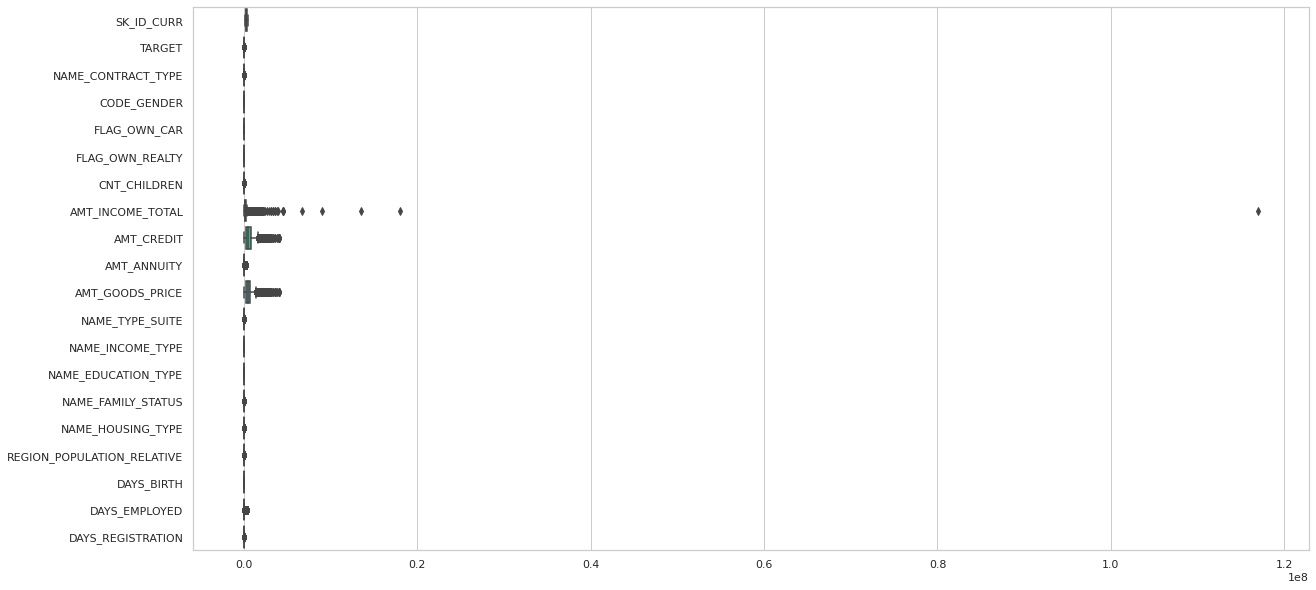

In [15]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.boxplot(data=dataset.iloc[:,:20],orient='h')
#Change the iloc params to see the outliars in the dataSet 
#train_data.AMT_GOODS_PRICE,train_data.AMT_CREDIT,train_data.AMT_INCOME_TOTAL  have outliars

In [16]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
l_bound =Q1 - 1.5*IQR
u_bound =Q1 + 1.5*IQR 

#Checking Purpose whether the vlaues are Correct  or Not
print(Q1['AMT_CREDIT']) 
print(Q3['AMT_CREDIT']) 
print(IQR['AMT_CREDIT'])  
print(l_bound['AMT_CREDIT']) 
print(u_bound['AMT_CREDIT'] )

270000.0
808650.0
538650.0
-537975.0
1077975.0


In [17]:
dataset[dataset.AMT_CREDIT > u_bound['AMT_CREDIT']] = u_bound['AMT_CREDIT'] 
dataset[dataset['AMT_INCOME_TOTAL'] > u_bound['AMT_INCOME_TOTAL']] = u_bound['AMT_INCOME_TOTAL']
dataset[dataset.DAYS_LAST_PHONE_CHANGE < l_bound['DAYS_LAST_PHONE_CHANGE']]= l_bound['DAYS_LAST_PHONE_CHANGE']
dataset[dataset.AMT_GOODS_PRICE > u_bound['AMT_GOODS_PRICE']] = u_bound['AMT_GOODS_PRICE']

 #Capping the Outlairs to the upper/lower digit for all the dimensions  

**The Data Set is Outlairs Free and variables whose Percent of Null Values are more than 30% have been removed **

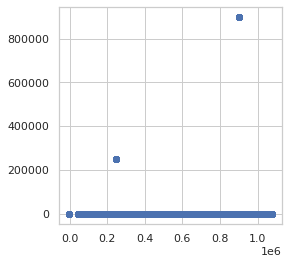

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x=dataset['AMT_CREDIT'], y=dataset['TARGET'])

In [19]:
dataset.DAYS_BIRTH *= -1 
dataset.DAYS_EMPLOYED *= -1 
dataset.DAYS_REGISTRATION *= -1 
dataset.DAYS_ID_PUBLISH *= -1 
dataset.DAYS_LAST_PHONE_CHANGE *= -1 

#To make it positive data as all the days value were in Negative

In [20]:
len(dataset.duplicated())

307511

In [21]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,4.0,3.0,1.0,0.018801,9461.0,637.0,3648.0,2120.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,1.0,2.0,2.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.262949,3.0,0.0,5.0,0.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.000000,-247500.0,-247500.0,-247500.0,-247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.000000,247500.0,247500.0,247500.0,247500.0,-247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0,247500.0
2,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,4.0,3.0,1.0,0.010032,19046.0,225.0,4260.0,2531.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,1.0,2.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.555912,0.0,1.0,7.0,2.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,6.0,7.0,4.0,0.0,1.0,0.008019,19005.0,3039.0,9833.0,2437.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,2.0,2.0,2.0,6.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.650442,0.0,1.0,7.0,2.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,6.0,7.0,4.0,3.0,1.0,0.028663,19932.0,3038.0,4311.0,3458.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,4.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,37.0,0.322738,0.0,1.0,7.0,2.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# dropping ALL duplicte values 
dataset.drop_duplicates(keep =False, inplace = True) 

In [23]:
for col in dataset.columns:
  if dataset[col].isnull().sum()> 0 :
    print(col)

#To Check whether any other NAN values Columns is there or Not

AMT_ANNUITY
AMT_GOODS_PRICE
CNT_FAM_MEMBERS
EXT_SOURCE_2
DAYS_LAST_PHONE_CHANGE


In [24]:
dataset[['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE']].head()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,1.0,0.262949,1134.0
2,6750.0,135000.0,1.0,0.555912,815.0
3,29686.5,297000.0,2.0,0.650442,617.0
4,21865.5,513000.0,1.0,0.322738,1106.0
5,27517.5,454500.0,2.0,0.354225,2536.0


In [25]:
dataset['EXT_SOURCE_2'].fillna(dataset['EXT_SOURCE_2'].mean(),inplace=True)
dataset['DAYS_LAST_PHONE_CHANGE'].fillna(dataset['DAYS_LAST_PHONE_CHANGE'].mean(),inplace=True)
dataset['CNT_FAM_MEMBERS'].fillna(dataset['CNT_FAM_MEMBERS'].mode()[0],inplace=True)
dataset['AMT_GOODS_PRICE'].fillna(dataset['AMT_GOODS_PRICE'].median(),inplace=True)
dataset['AMT_ANNUITY'].fillna(dataset['AMT_ANNUITY'].mode()[0],inplace=True)

In [ ]:
x=dataset.copy()
y=dataset['TARGET']
del x['TARGET']
del x['SK_ID_CURR']
x.columns

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
a= dataset[['AMT_ANNUITY','EXT_SOURCE_2','DAYS_EMPLOYED','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','NAME_CONTRACT_TYPE','ORGANIZATION_TYPE','AMT_CREDIT','FONDKAPREMONT_MODE','HOUR_APPR_PROCESS_START','FLAG_PHONE','CNT_CHILDREN','FLAG_WORK_PHONE','LIVE_CITY_NOT_WORK_CITY','NAME_HOUSING_TYPE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','DAYS_REGISTRATION','FLAG_DOCUMENT_3','CODE_GENDER','NAME_EDUCATION_TYPE','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']]

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [47]:
X_train_std  =scaler.fit_transform(X_train)
X_test_std  = scaler.fit_transform(X_test)

** LOGISTIC REGRESSION Model ** 

In [48]:
LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(X_train_std,Y_train)
LR_y_pred = LR_model.predict(X_test_std)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,LR_y_pred))

0.9123057879460474


In [50]:
confusion_matrix(Y_test,LR_y_pred)

array([[42744,     6],
       [ 4103,     3]])

In [51]:
r2_score(Y_test,LR_y_pred)

-0.09684759715492652

In [52]:
LR_model.intercept_

array([-2.59130945])

In [ ]:
 LR_model.coef_

# ***Random Forest Classifier ***

In [38]:
#RandomForestClassifier
RF_model= RandomForestClassifier(n_estimators=1000,warm_start=True,random_state=10)
RF_model.fit(X_train,Y_train)
RF_y_pred = RF_model.predict(X_test)
accuracy_score(Y_test,RF_y_pred)

0.9125192077855557

In [39]:
pd.crosstab(Y_test,RF_y_pred)

col_0,0.0,1.0
TARGET,,
0.0,42746,4
1.0,4095,11


In [40]:
r2_score(Y_test,RF_y_pred)

-0.09417821872427456

In [41]:
from xgboost import XGBClassifier

In [44]:
#XGBClassifier
XGB_model= XGBClassifier()
XGB_model.fit(X_train,Y_train)
XGB_y_pred = XGB_model.predict(X_test)
accuracy_score(Y_test,XGB_y_pred)

0.9123911558818508

In [45]:
pd.crosstab(Y_test,XGB_y_pred)

col_0,0.0,1.0
TARGET,,
0.0,42748,2
1.0,4103,3
